In [71]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()


### Financial Sector Performance 2006 - 2016

In [72]:

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

BAC['Ticker'] = 'BAC'
C['Ticker'] = 'C'
GS['Ticker'] = 'GS'
JPM['Ticker'] = 'JMP'
MS['Ticker'] = 'MS'
WFC['Ticker'] = 'WFC'

In [73]:
tickers = ['BAC','C', 'GS', 'JPM', 'MS', 'WFC']

In [74]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.811729   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.442013   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.486385   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.434616   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.456806   

                            C                          ...         MS  \
           Ticker        High         Low        Open  ...     Volume   
Date                                                   ...              
2006-01-03    BAC  493.799988  481.100006  490.000000  ...  5377000.0   
2006-01-04    BAC  491.000000  483.500000  488.600006  ...  7977800.0   
2006-01-05    BAC  487.799988  484.000000  484.399994  ...  5778000.0   
2006-01-06    BAC  489.000000  482.000000  488.799988  ...  6889800.0   
2006-01-09    BAC  487.399994  483.000000  486.000000  ...  4144500.0   

                                    WFC                                   \
            Adj Close Ticker       High        Low       Open      Close   
Date                                                                       
2006-01-03  37.140598     MS  31.975000  31.195000  31.600000  31.900000   
2006-01-04  37.166069     MS  31.820000  31.365000  31.799999  31.530001   
2006-01-05  37.267979     MS  31.555000  31.309999  31.500000  31.495001   
2006-01-06  37.306194     MS  31.775000  31.385000  31.580000  31.680000   
2006-01-09  37.701099     MS  31.825001  31.555000  31.674999  31.674999   

                                          
                Volume  Adj Close Ticker  
Date                                      
2006-01-03  11016400.0  20.818630    WFC  
2006-01-04  10870000.0  20.577162    WFC  
2006-01-05  10158000.0  20.554317    WFC  
2006-01-06   8403800.0  20.675053    WFC  
2006-01-09   5619600.0  20.671791    WFC  

[5 rows x 42 columns]

In [75]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [76]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                             C                          ...  \
Stock Info   Adj Close Ticker        High         Low        Open  ...   
Date                                                               ...   
2006-01-03   34.811729    BAC  493.799988  481.100006  490.000000  ...   
2006-01-04   34.442013    BAC  491.000000  483.500000  488.600006  ...   
2006-01-05   34.486385    BAC  487.799988  484.000000  484.399994  ...   
2006-01-06   34.434616    BAC  489.000000  482.000000  488.799988  ...   
2006-01-09   34.456806    BAC  487.399994  483.000000  486.000000  ...   

Bank Ticker         MS                          WFC                        \
Stock Info      Volume  Adj Close Ticker       High        Low       Open   
Date                                                                        
2006-01-03   5377000.0  37.140598     MS  31.975000  31.195000  31.600000   
2006-01-04   7977800.0  37.166069     MS  31.820000  31.365000  31.799999   
2006-01-05   5778000.0  37.267979     MS  31.555000  31.309999  31.500000   
2006-01-06   6889800.0  37.306194     MS  31.775000  31.385000  31.580000   
2006-01-09   4144500.0  37.701099     MS  31.825001  31.555000  31.674999   

Bank Ticker                                           
Stock Info       Close      Volume  Adj Close Ticker  
Date                                                  
2006-01-03   31.900000  11016400.0  20.818630    WFC  
2006-01-04   31.530001  10870000.0  20.577162    WFC  
2006-01-05   31.495001  10158000.0  20.554317    WFC  
2006-01-06   31.680000   8403800.0  20.675053    WFC  
2006-01-09   31.674999   5619600.0  20.671791    WFC  

[5 rows x 42 columns]

In [77]:
# bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

In [78]:
bank_stocks.head(1)

Bank Ticker    BAC                                                          \
Stock Info    High        Low       Open      Close      Volume  Adj Close   
Date                                                                         
2006-01-03   47.18  46.150002  46.919998  47.080002  16296700.0  34.811729   

Bank Ticker                  C                     ...         MS             \
Stock Info  Ticker        High         Low   Open  ...     Volume  Adj Close   
Date                                               ...                         
2006-01-03     BAC  493.799988  481.100006  490.0  ...  5377000.0  37.140598   

Bank Ticker            WFC                                                   
Stock Info  Ticker    High     Low  Open Close      Volume Adj Close Ticker  
Date                                                                         
2006-01-03      MS  31.975  31.195  31.6  31.9  11016400.0  20.81863    WFC  

[1 rows x 42 columns]

In [79]:
max_at_close = bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

In [80]:
returns = pd.DataFrame()

In [81]:
for tick in tickers:
    returns[tick+ ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


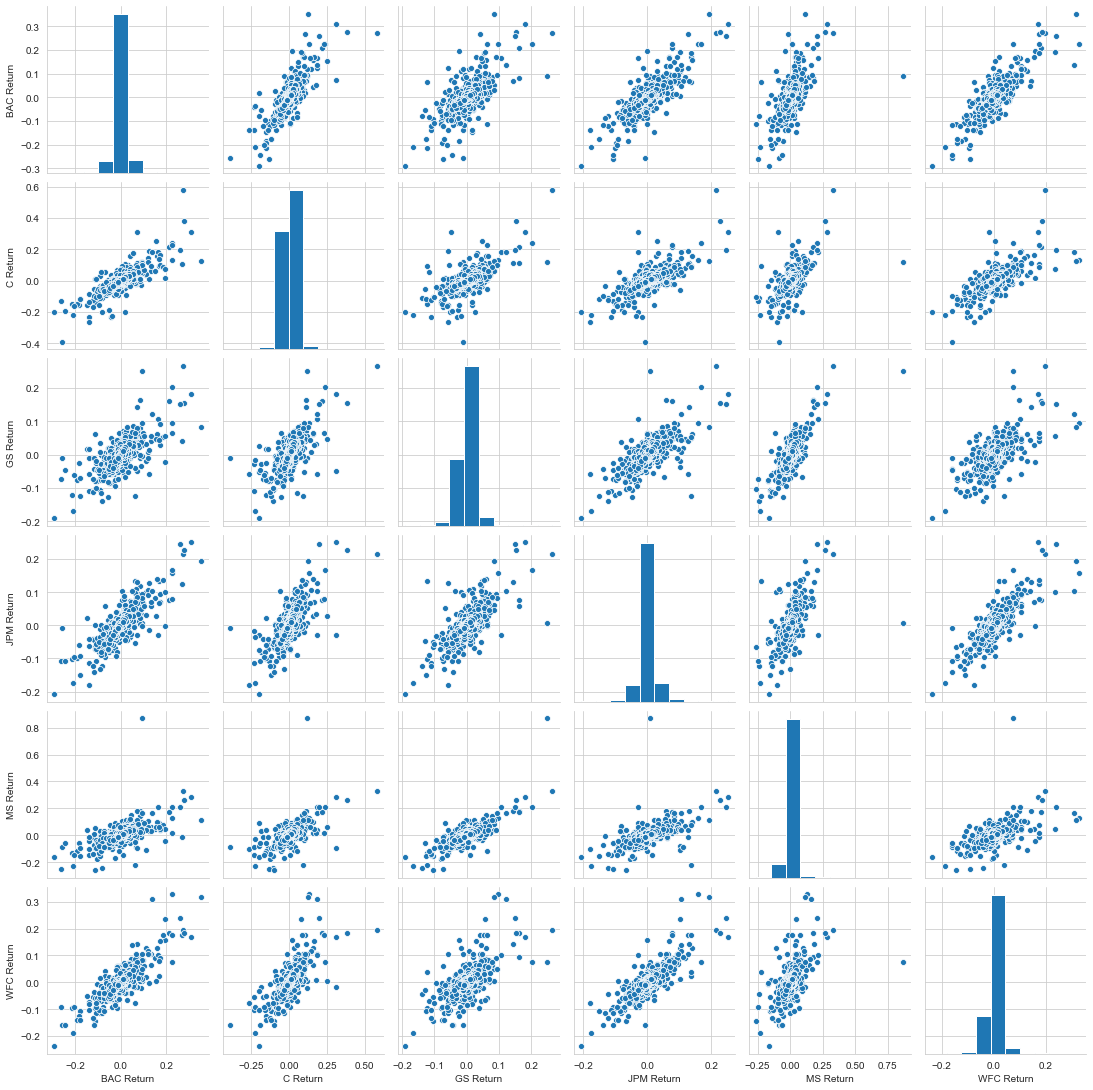

In [82]:
sns.set_style('whitegrid')
sns.pairplot(data=returns[1:])
plt.show()

In [83]:
returns.idxmin(axis=0)

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [84]:
returns.idxmax(axis=0)

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [85]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [86]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

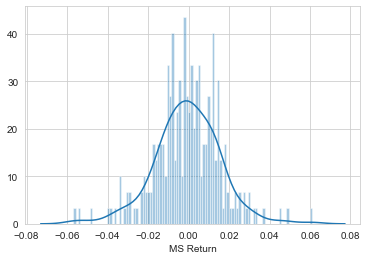

In [87]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=100)
plt.show()

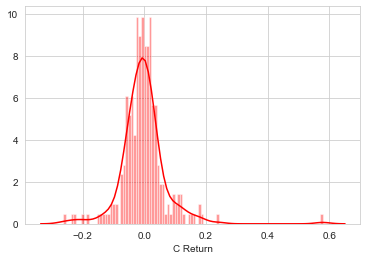

In [88]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins=100,color='red')
plt.show()

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

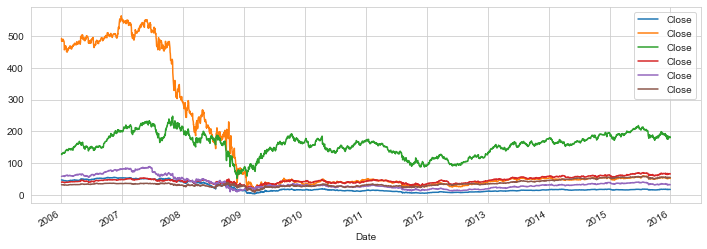

In [90]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4))
plt.legend()
plt.show()

<Figure size 1080x720 with 0 Axes>

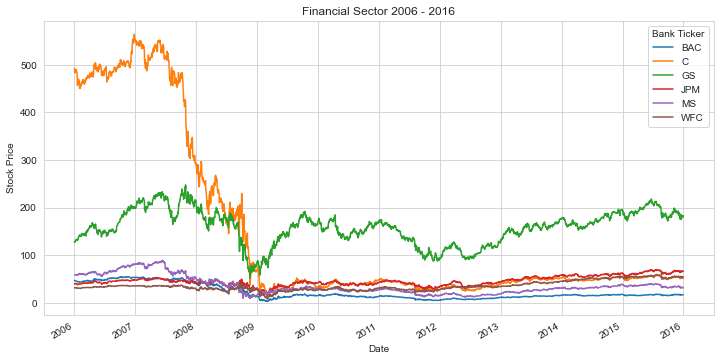

In [91]:
plt.figure(figsize=(15,10))
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,6), label= tick)
plt.title('Financial Sector 2006 - 2016')
plt.ylabel('Stock Price')
plt.show()

In [92]:
tickers[0]

'BAC'

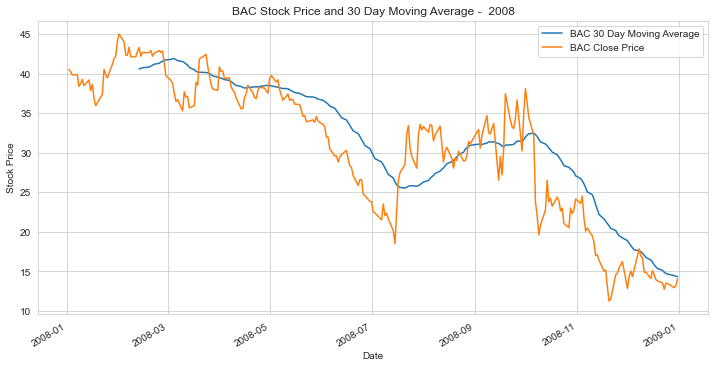

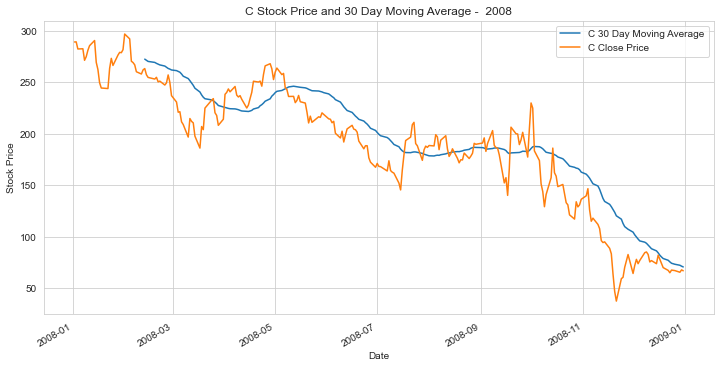

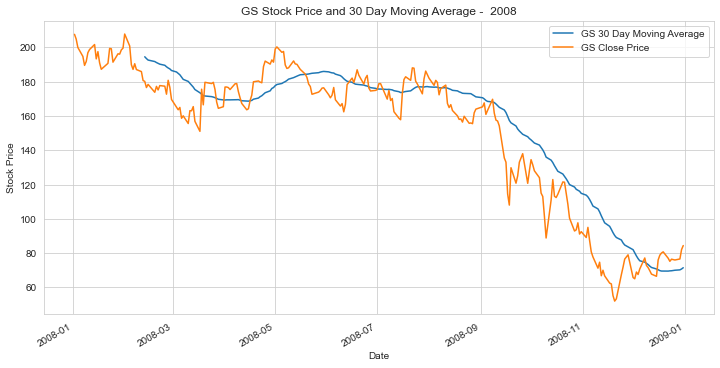

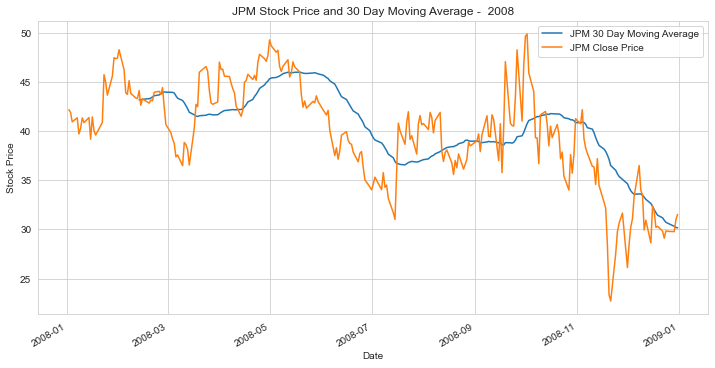

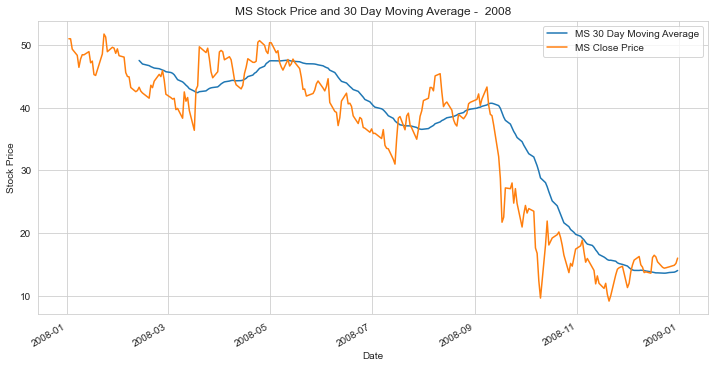

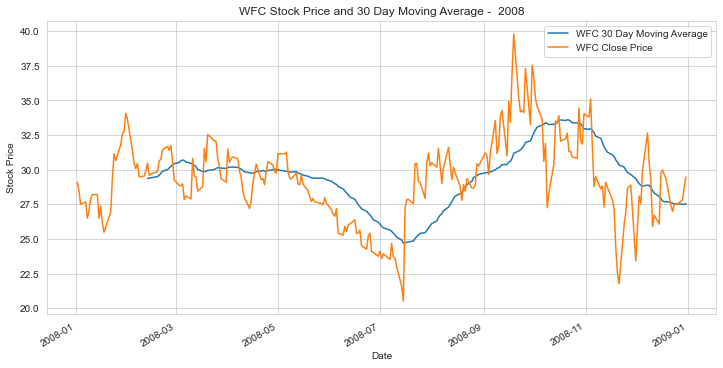

In [93]:
for tick in tickers:
    plt.figure(figsize=(12,6))
    bank_stocks[tick]['Close']['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label = f'{tick} 30 Day Moving Average')
    bank_stocks[tick]['Close']['2008-01-01':'2008-12-31'].plot(label = f"{tick} Close Price")
    plt.legend()
    plt.title(f'{tick} Stock Price and 30 Day Moving Average -  2008')
    plt.ylabel('Stock Price')
    plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

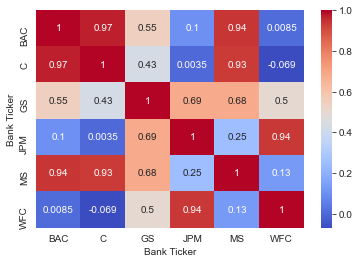

In [94]:
sns.heatmap(data = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),cmap='coolwarm',annot=True)
plt.show()

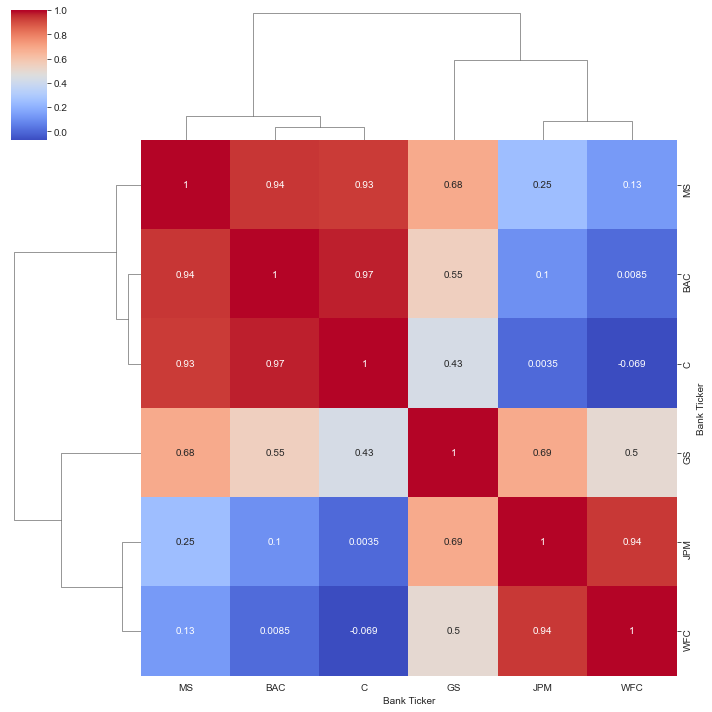

In [95]:
sns.clustermap(data = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),cmap='coolwarm',annot=True)
plt.show()

In [96]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [97]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [98]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')